In [1]:
#import the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/My Drive/Datasets/dataset.csv')

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [6]:
df['MultipleLines'].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [7]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [8]:
df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [9]:
df['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39])

In [10]:
#Converting the Churn value to binary
df['Churn'] = np.where(df.Churn == 'Yes',1,0)

In [11]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,0.265370
std,0.368612,24.559481,30.090047,0.441561
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,0.000000
50%,0.000000,29.000000,70.350000,0.000000
75%,0.000000,55.000000,89.850000,1.000000
max,1.000000,72.000000,118.750000,1.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [13]:
# Converting TotalCharges to numeric value:

df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


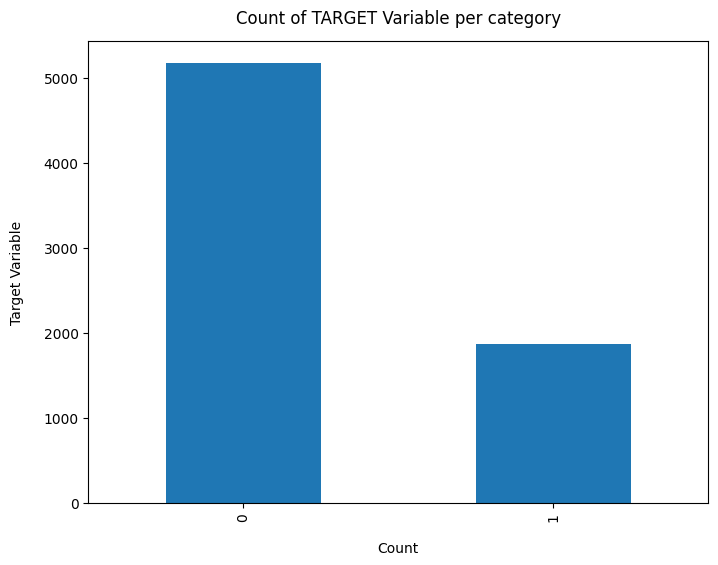

In [14]:
df['Churn'].value_counts().plot(kind='bar', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

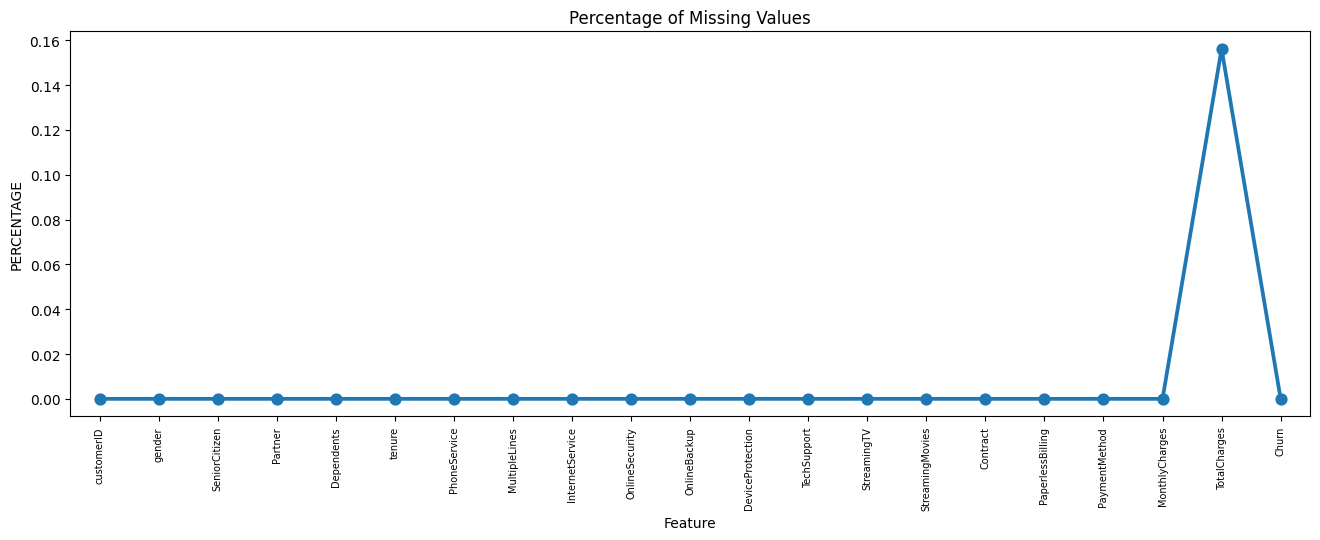

In [16]:
#Visualizing the percentace of missing values:

missing = pd.DataFrame((df.isnull().sum()) * 100 / df.shape[0]).reset_index()
missing.columns = ['Feature', 'MissingPercentage']  # Rename columns for clarity

# Plotting
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='Feature', y='MissingPercentage', data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing Values")
plt.ylabel("PERCENTAGE")
plt.show()

In [17]:
df_copy = df.copy()

In [18]:
#Dropping the missing values as the percentage is low

df.dropna(inplace=True)

In [19]:
# Get the max tenure

print(df['tenure'].max()) #72

72


In [20]:
# Group the tenure in bins of 12 months

labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]
labels

['1 - 12', '13 - 24', '25 - 36', '37 - 48', '49 - 60', '61 - 72']

In [21]:
df['tenure_group'] = pd.cut(df.tenure, range(1, 80, 12), right=False, labels=labels)

In [22]:
df['tenure_group'].value_counts()

,count
tenure_group,
1 - 12,2175
61 - 72,1407
13 - 24,1024
25 - 36,832
49 - 60,832
37 - 48,762


In [23]:
#drop column customerID and tenure
df.drop(columns= ['customerID','tenure'], axis=1, inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


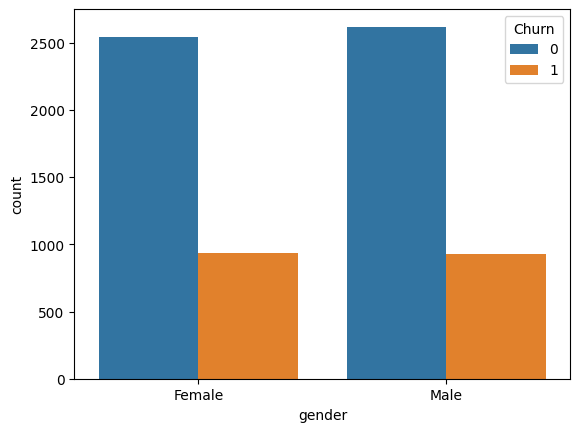

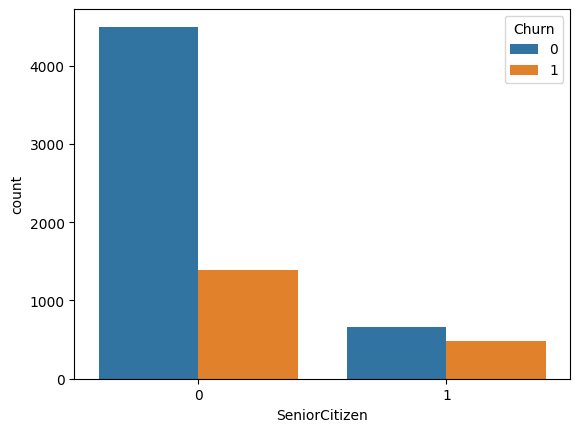

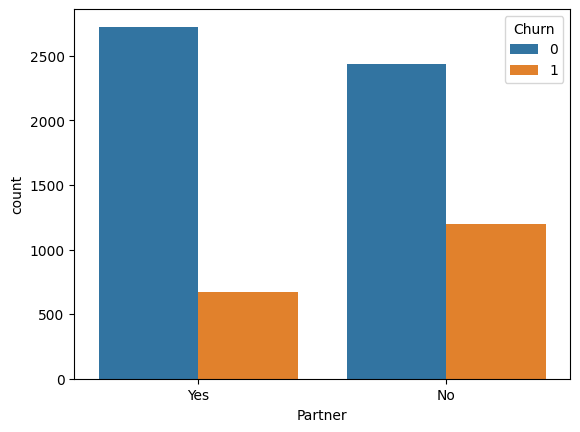

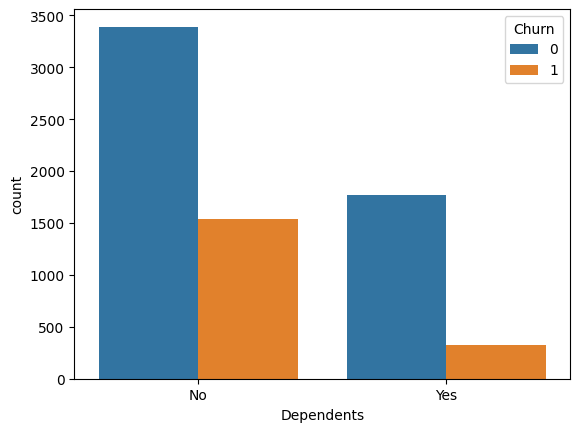

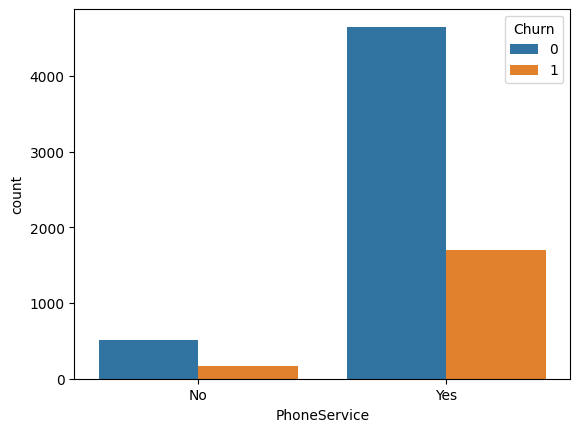

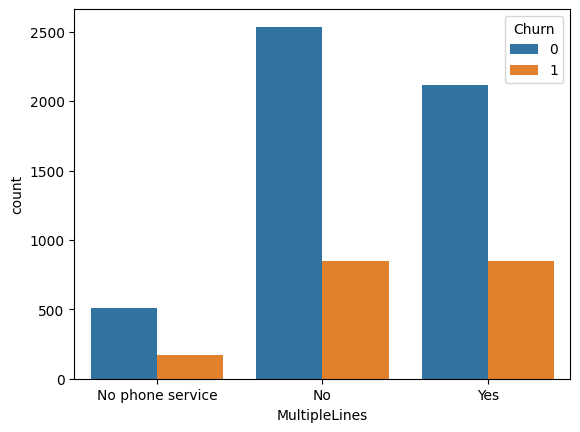

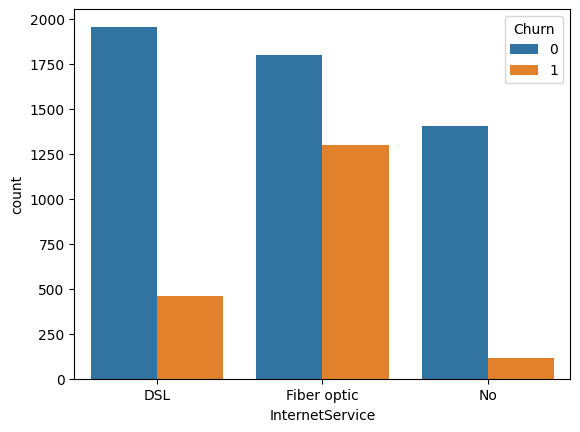

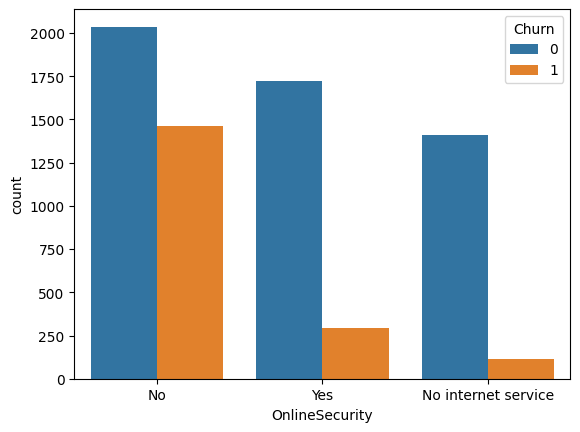

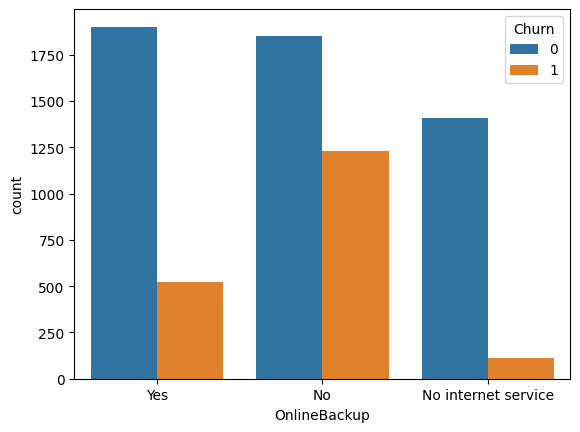

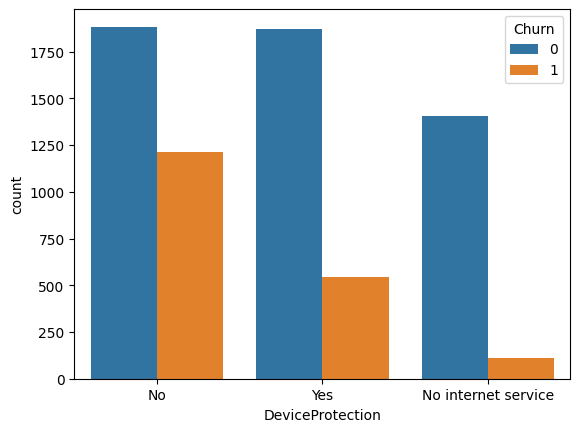

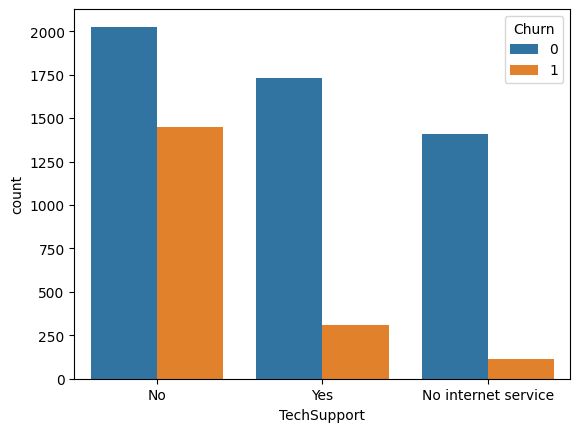

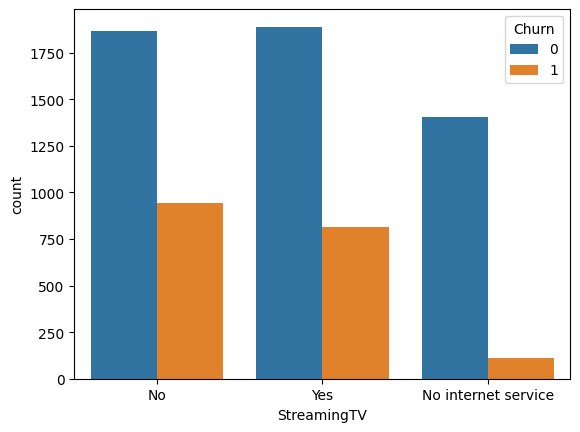

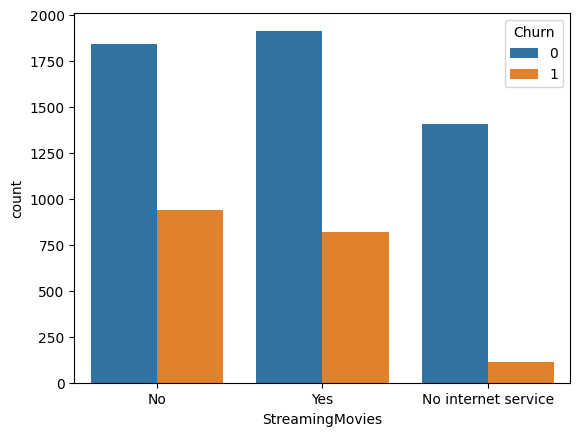

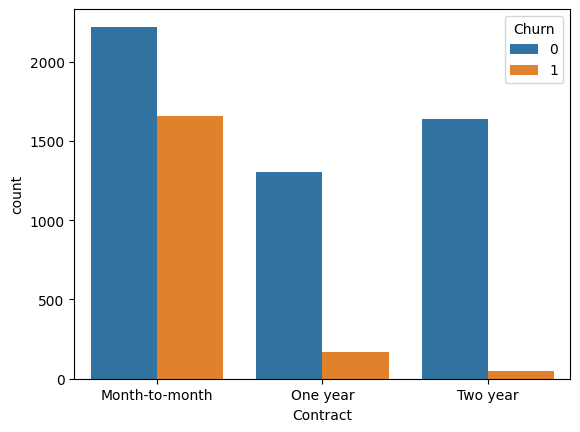

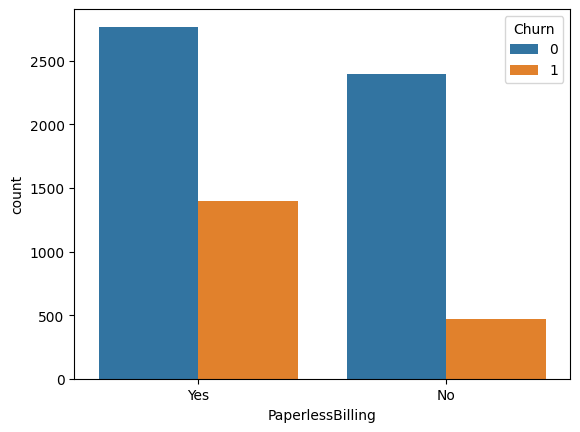

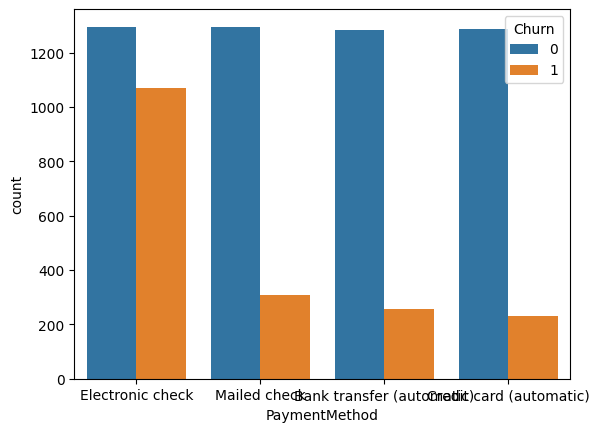

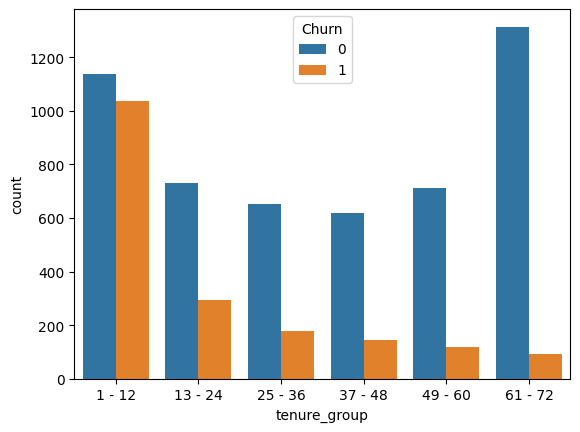

In [24]:
for i, predictor in enumerate(df.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=df, x=predictor, hue='Churn')

In [25]:
#One hot encoding the categorical data:

df_oneHot = pd.get_dummies(df)
df_oneHot.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,True,False,False,True,True,False,...,False,False,True,False,True,False,False,False,False,False
1,0,56.95,1889.50,0,False,True,True,False,True,False,...,False,False,False,True,False,False,True,False,False,False
2,0,53.85,108.15,1,False,True,True,False,True,False,...,False,False,False,True,True,False,False,False,False,False
3,0,42.30,1840.75,0,False,True,True,False,True,False,...,True,False,False,False,False,False,False,True,False,False
4,0,70.70,151.65,1,True,False,True,False,True,False,...,False,False,True,False,True,False,False,False,False,False


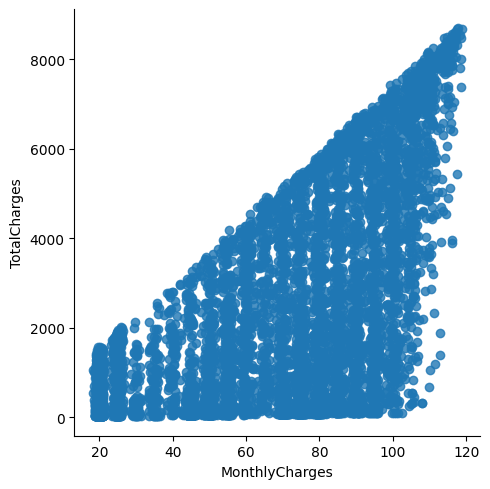

In [26]:
#Visualizing the realationship between TotalCharges and MonthlyCharges

sns.lmplot(data=df_oneHot, x='MonthlyCharges', y='TotalCharges', fit_reg=False)

<ipython-input-27-7c49033e3928>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(df_oneHot.MonthlyCharges[(df_oneHot["Churn"] == 0) ], color="Red", shade = True)
<ipython-input-27-7c49033e3928>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(df_oneHot.MonthlyCharges[(df_oneHot["Churn"] == 1) ], color="blue", shade= True)


Text(0.5, 1.0, 'Monthly charges by churn')

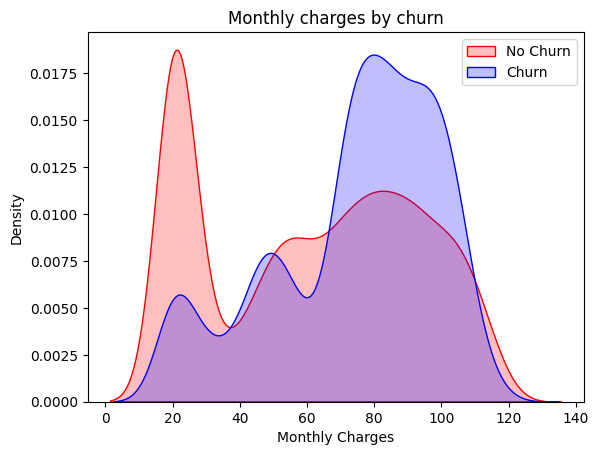

In [27]:
#Visualizing how churn changes with MonthlyCharges

Mth = sns.kdeplot(df_oneHot.MonthlyCharges[(df_oneHot["Churn"] == 0) ], color="Red", shade = True)
Mth = sns.kdeplot(df_oneHot.MonthlyCharges[(df_oneHot["Churn"] == 1) ], color="blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

<ipython-input-28-04601af0accb>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(df_oneHot.TotalCharges[(df_oneHot["Churn"] == 0) ], color="Red", shade = True)
<ipython-input-28-04601af0accb>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(df_oneHot.TotalCharges[(df_oneHot["Churn"] == 1) ], ax =Tot, color="Blue", shade= True)


Text(0.5, 1.0, 'Total charges by churn')

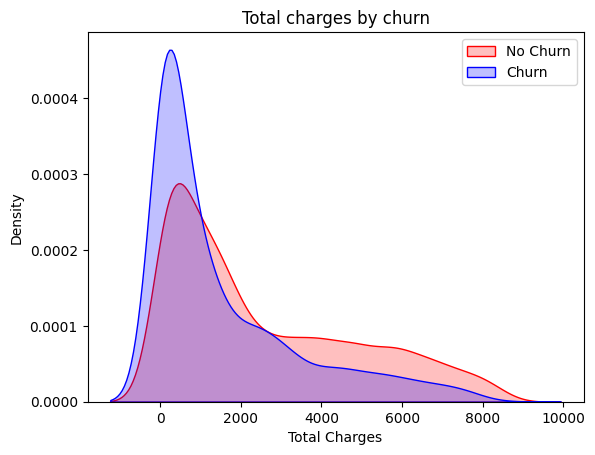

In [28]:
#Visualizing how churn changes with MonthlyCharges

Tot = sns.kdeplot(df_oneHot.TotalCharges[(df_oneHot["Churn"] == 0) ], color="Red", shade = True)
Tot = sns.kdeplot(df_oneHot.TotalCharges[(df_oneHot["Churn"] == 1) ], ax =Tot, color="Blue", shade= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges by churn')


## Inference from the above plots:
* Churn is high when monthly charges are high and Total Charges are low
   
* However if we combine the insights of  Tenure, Monthly Charges & Total Charges, we see that Higher Monthly Charge at lower tenure results into lower Total Charge.

* Hence, **Higher** *Monthly Charge*, *Lower tenure* and *Lower Total Charge* are linkd to **High** Churn.



<Axes: >

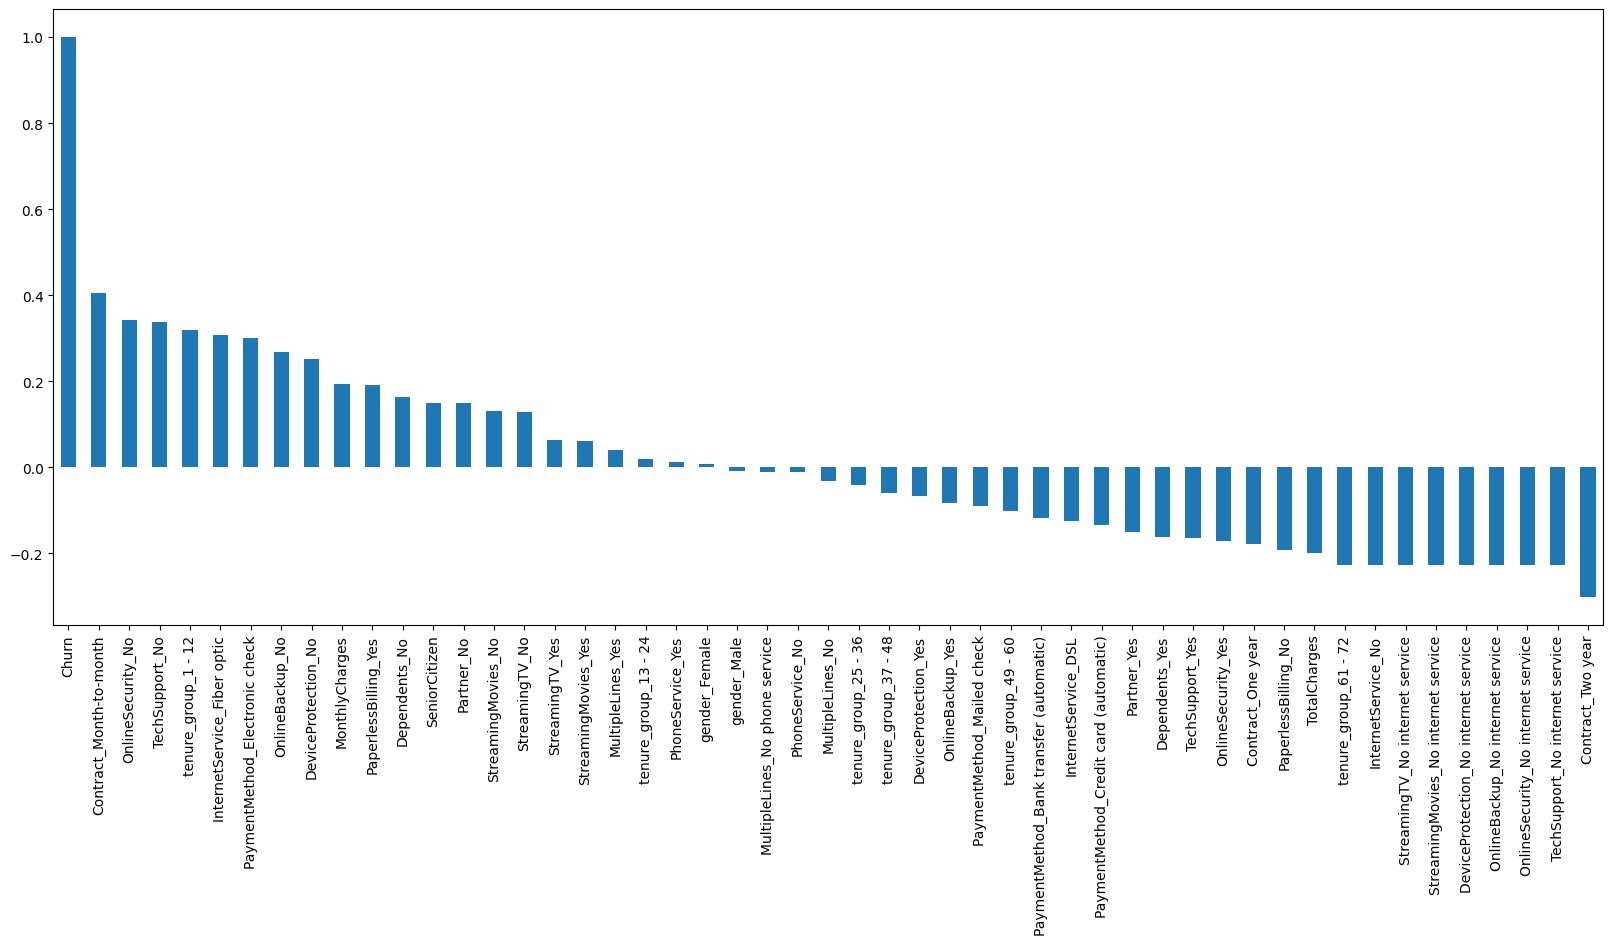

In [29]:
# Plotting correlation of all features with Churn

plt.figure(figsize=(20,8))
df_oneHot.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

## Inference from Correlation plot:
 * **HIGH** Churn seen in case of "Month to month contracts", "No online security", "No Tech support", "First year of subscription" and "Fibre Optics Internet Service", which have a ***positive correlation*** with Churn

* **LOW** Churn is seen in case of "2 year contracts", "no internet service", "tenure group 61-72", "Total Charges", etc., which show a ***non-positive correlation*** with Churn


* Factors like Gender, Availability of PhoneService and nuumber of multiple lines have alomost NO impact on Churn

<Axes: >

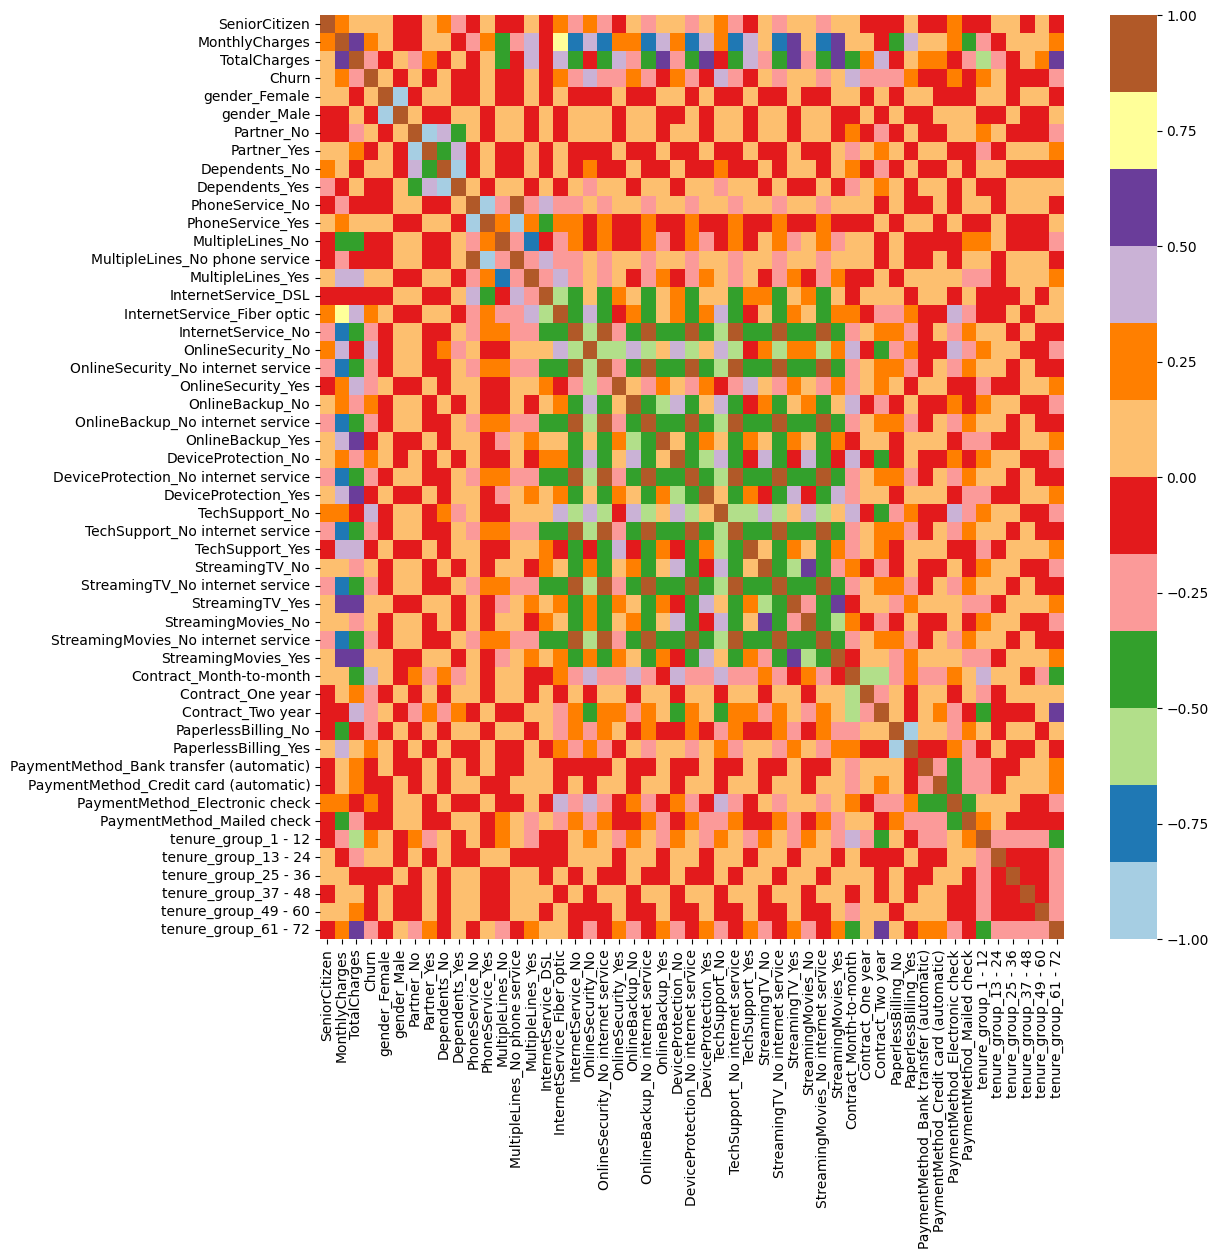

In [30]:
#Plotting a heatmap for correlation:

plt.figure(figsize=(12,12))

sns.heatmap(df_oneHot.corr(), cmap="Paired")

In [31]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'tenure_group'],
      dtype='object')

## Bivariate Alalysis:

In [32]:
df2_noChurn = df.loc[df["Churn"]==0]
df2_churn = df.loc[df["Churn"]==1]

In [33]:
def uniplot(df,col,title,hue =None):

    sns.set_style('whitegrid')
    sns.set_context('talk')
#     plt.rcParams["axes.labelsize"] = 20
#     plt.rcParams['axes.titlesize'] = 22
#     plt.rcParams['axes.titlepad'] = 30


    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
#     width = len(df[col].unique()) + 7 + 4*len(temp.unique())
#     fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright')

    plt.show()

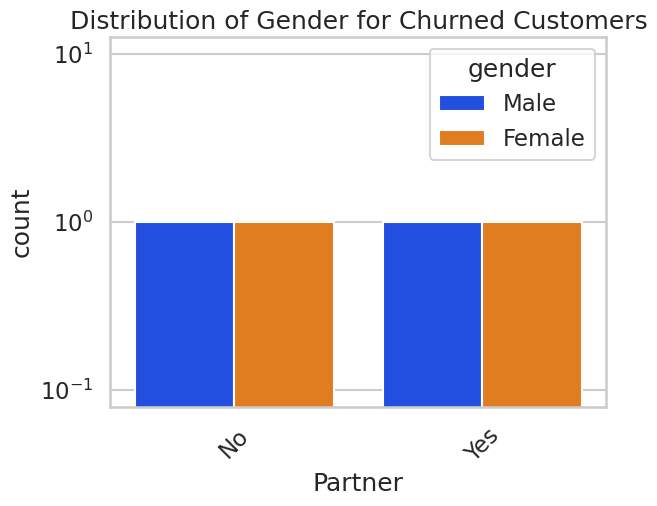

In [34]:

uniplot(df2_churn, col='Partner', title='Distribution of Gender for Churned Customers',hue='gender')

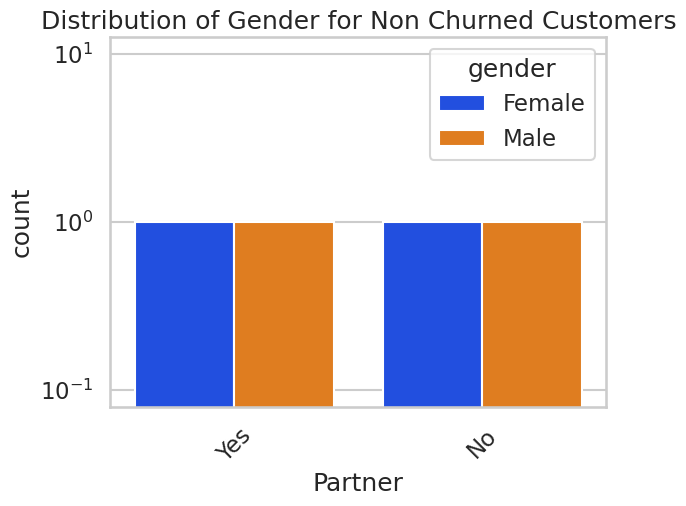

In [35]:
uniplot(df2_noChurn, col='Partner', title='Distribution of Gender for Non Churned Customers', hue='gender')

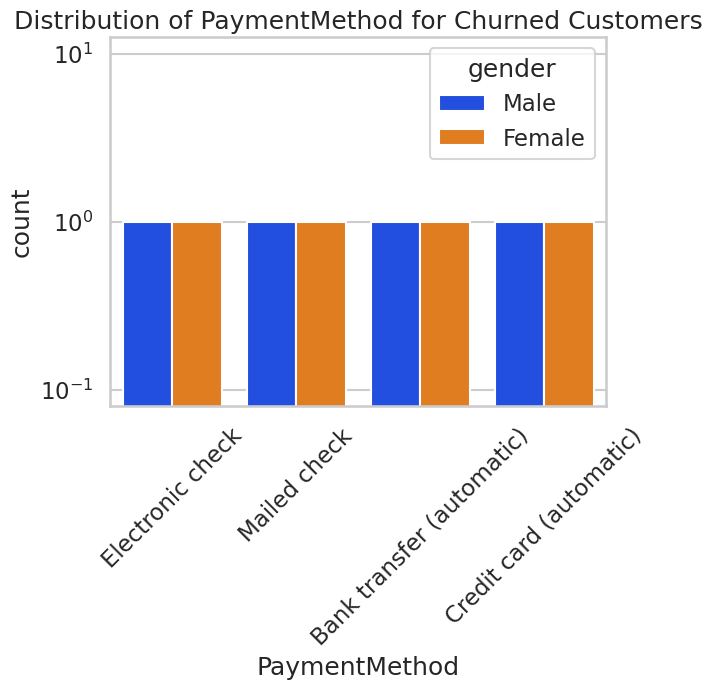

In [36]:
uniplot(df2_churn,col='PaymentMethod',title='Distribution of PaymentMethod for Churned Customers',hue='gender')

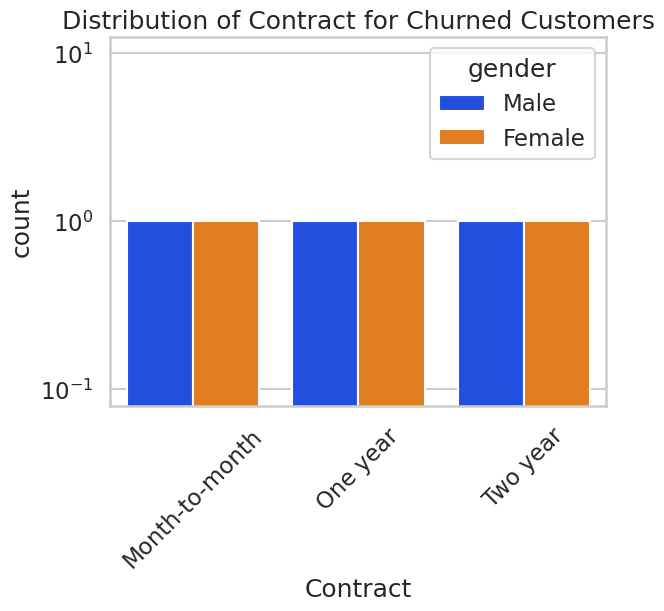

In [37]:
uniplot(df2_churn,col='Contract',title='Distribution of Contract for Churned Customers',hue='gender')

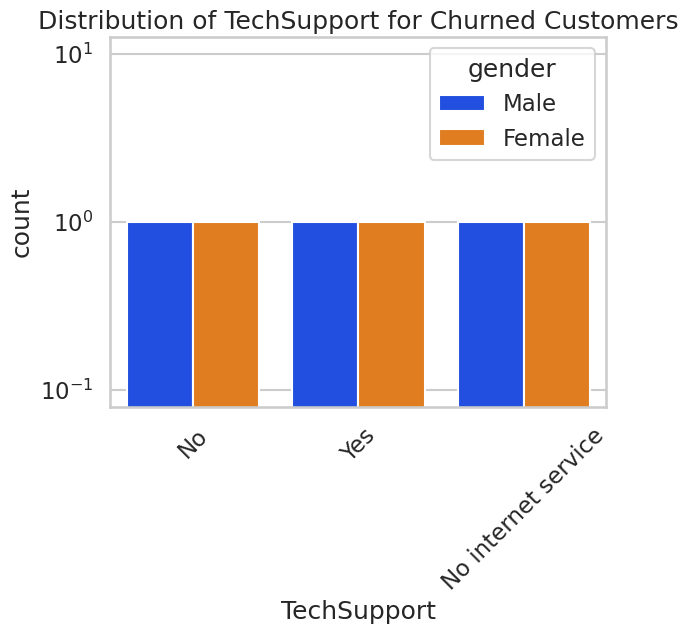

In [38]:

uniplot(df2_churn,col='TechSupport',title='Distribution of TechSupport for Churned Customers',hue='gender')

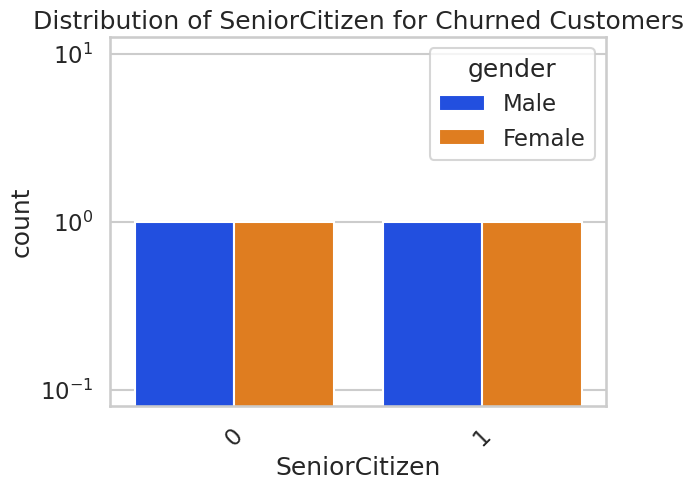

In [39]:

uniplot(df2_churn,col='SeniorCitizen',title='Distribution of SeniorCitizen for Churned Customers',hue='gender')

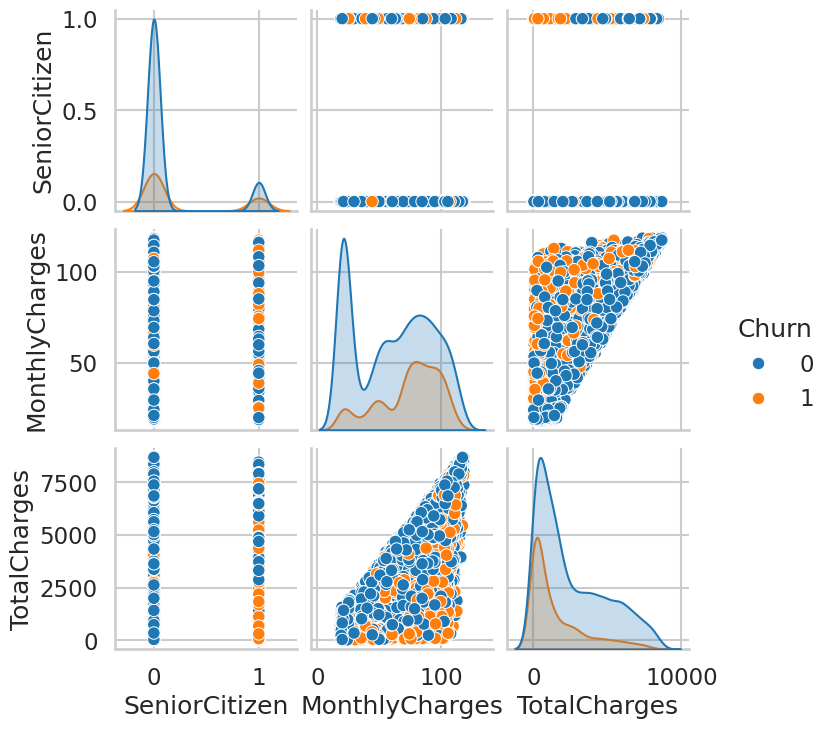

In [40]:
sns.pairplot(df, hue="Churn")

## Conclusion:

* **Payment Method:** Customers who use Electronic Check are the higest churners


* **Contract Type:** Customers with long term contracts are more likely to churn than the customers with short term contracts


* **Tech Support:** Customers with no tech support churn more


* **Senior citizens:** Senior citizens are less likely to churn compared to non senior citizens


In [45]:
df_oneHot.to_csv('/content/drive/My Drive/Datasets/df_preprocessed.csv')